# Analyse exploratoire des données du site e-commerce Olist

Ce notebook regroupe les travaux d'analyse exploratoire en vue de réaliser une segmentation client de la marketplace.

## Contexte

La maketplace brésilienne [Olist](https://olist.com/) cherche à réaliser une segmentation de ses clients afin de réaliser de futures actions de communication/marketing. 

Afin de la réliaser le site mais à disposition les [données des transactions réalisée depuis janvier 2017](https://www.kaggle.com/olistbr/brazilian-ecommerce). Celles-ci sont réparties dans plusieurs fichiers:

- olist_customers_dataset.csv : Listing des clients
- olist_geolocalisation_dataset.csv: Données de localisation des clients
- olist_order_items_dataset.csv: listing des produits commandés
- olist_order_payments_dataset.csv: Listing des paiements 
- olist_order_reviews_dataset.csv: Listing des évaluations clients
- olist_orders8dataset.csv: Listing des commandes
- olist_sellers_dataset.csv: Listing des vendeurs
- olist_product_category_name_translaion.csv

- olist_marketing_qualified_leads_dataset.csv : leads qualifiés
- olist_closed_deals_dataset.csv: Transactions réalisées

Le site souhaite également qu'un devis de contrat de maintenance de la segmentation soit réalisé.

Les élements du brief sont disponnibles [en ligne](https://openclassrooms.com/fr/paths/148/projects/630/assignment). 

## Importation des données

Nous commençons par visualiser tous les jeux de données afin d'identifier des jointure qui seraient pertinentes de réaliser.

In [1]:
import IPython.display
import pandas as pd
pd.set_option("display.max_columns", None)

import seaborn as sns
from pylab import *
%matplotlib inline
plt.style.use("seaborn")


cu = pd.read_csv("data/olist_customers_dataset.csv")
print("Cinq premières observations du fichier olist_customers_dataset.csv ")
display(cu.head())
print(f"Nombre d'observations du dataset: {cu.shape[0]}, nombre de variables {cu.shape[1]}\n")
print("-"*150)

ge = pd.read_csv("data/olist_geolocation_dataset.csv")
print("Cinq premières observations du fichier olist_geolocation_dataset.csv")
display(ge.head())
print(f"Nombre d'observations du dataset: {ge.shape[0]}, nombre de variables {ge.shape[1]}\n")
print("-"*150)

oi = pd.read_csv("data/olist_order_items_dataset.csv")
print("Cinq premières observations du fichier olist_order_items_dataset.csv")
display(oi.head())
print(f"Nombre d'observations du dataset: {oi.shape[0]}, nombre de variables {oi.shape[1]}\n")
print("-"*150)

op = pd.read_csv("data/olist_order_payments_dataset.csv")
print("Cinq premières observations du fichier olist_order_payments_dataset.csv")
display(op.head())
print(f"Nombre d'observations du dataset: {op.shape[0]}, nombre de variables {op.shape[1]}\n")
print("-"*150)

ore = pd.read_csv("data/olist_order_reviews_dataset.csv")
print("Cinq premières observations du fichier olist_order_reviews_dataset.csv")
display(ore.head())
print(f"Nombre d'observations du dataset: {ore.shape[0]}, nombre de variables {ore.shape[1]}\n")
print("-"*150)

od = pd.read_csv("data/olist_orders_dataset.csv")
print("Cinq premières observations du fichier olist_orders_dataset.csv")
display(od.head())
print(f"Nombre d'observations du dataset: {od.shape[0]}, nombre de variables {od.shape[1]}\n")
print("-"*150)

pda = pd.read_csv("data/olist_products_dataset.csv")
print("Cinq premières observations du fichier olist_products_dataset.csv")
display(pda.head())
print(f"Nombre d'observations du dataset: {pda.shape[0]}, nombre de variables {pda.shape[1]}\n")
print("-"*150)

sd = pd.read_csv("data/olist_sellers_dataset.csv")
print("Cinq premières observations du fichier olist_sellers_dataset.csv")
display(sd.head())
print(f"Nombre d'observations du dataset: {sd.shape[0]}, nombre de variables {sd.shape[1]}\n")
print("-"*150)

pcn = pd.read_csv("data/product_category_name_translation.csv")
print("Cinq premières observations du fichier product_category_name_translation.csv")
display(pcn.head())
print(f"Nombre d'observations du dataset: {pcn.shape[0]}, nombre de variables {pcn.shape[1]}\n")
print("-"*150)

Cinq premières observations du fichier olist_customers_dataset.csv 


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Nombre d'observations du dataset: 99441, nombre de variables 5

------------------------------------------------------------------------------------------------------------------------------------------------------
Cinq premières observations du fichier olist_geolocation_dataset.csv


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Nombre d'observations du dataset: 1000163, nombre de variables 5

------------------------------------------------------------------------------------------------------------------------------------------------------
Cinq premières observations du fichier olist_order_items_dataset.csv


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Nombre d'observations du dataset: 112650, nombre de variables 7

------------------------------------------------------------------------------------------------------------------------------------------------------
Cinq premières observations du fichier olist_order_payments_dataset.csv


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Nombre d'observations du dataset: 103886, nombre de variables 5

------------------------------------------------------------------------------------------------------------------------------------------------------
Cinq premières observations du fichier olist_order_reviews_dataset.csv


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Nombre d'observations du dataset: 100000, nombre de variables 7

------------------------------------------------------------------------------------------------------------------------------------------------------
Cinq premières observations du fichier olist_orders_dataset.csv


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Nombre d'observations du dataset: 99441, nombre de variables 8

------------------------------------------------------------------------------------------------------------------------------------------------------
Cinq premières observations du fichier olist_products_dataset.csv


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Nombre d'observations du dataset: 32951, nombre de variables 9

------------------------------------------------------------------------------------------------------------------------------------------------------
Cinq premières observations du fichier olist_sellers_dataset.csv


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Nombre d'observations du dataset: 3095, nombre de variables 4

------------------------------------------------------------------------------------------------------------------------------------------------------
Cinq premières observations du fichier product_category_name_translation.csv


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Nombre d'observations du dataset: 71, nombre de variables 2

------------------------------------------------------------------------------------------------------------------------------------------------------


Voici l'odre des jointures que nous allons réaliser:
1. olist_customers_dataset.csv et  olist_orders_dataset
2. olist_orders_items sur la résultat de la précédente jointure
3. olist_products_dataset.csv sur le résultat de la précédente jointure
4. olist_sellers_dataset.csv sur le résultat de la précédente jointure
5. olist_order_payments_dataset.csv sur le résultat de la précédente jointure
6. olist_order_reviews_dataset.csv sur le résultat de la précédente jointure 

Le dataset product_category_name_translation ne fera pas l'objet d'une jointure mais servira à remaplacer les modalités de la colonne product_category_name

In [3]:
print("jointure  olist_customers_dataset.csv et  olist_orders_dataset.csv")
cuod = cu.merge(od, how='left', on='customer_id')
print("Affichage des cinq premières lignes du résultat")
display(cuod.head())
print(f"Nombre d'observations: {cuod.shape[0]}, nombre de variables {cuod.shape[1]}\n")
print('-'*150)

print("Jointure avec olist_orders_items")
cuodi = cuod.merge(oi, how='left', on='order_id')
print("Affichage des cinq premières lignes du résultat")
display(cuodi.head())
print(f"Nombre d'observations: {cuodi.shape[0]}, nombre de variables: {cuodi.shape[1]}\n")
print('-'*150)

print("Jointure avec olist_products_dataset")
cuodip = cuodi.merge(pda, how='left', on='product_id')
print("Affichage des cinq premières lignes du résultat")
display(cuodip.head())
print(f"Nombre d'observations: {cuodip.shape[0]}, nombre de variables: {cuodip.shape[1]}\n")
print('-'*150)

print("Jointure avec olist_sellers_dataset")
cuodips = cuodip.merge(sd, how='left', on='seller_id')
print("Affichage des cinq premières lignes du résultat")
display(cuodips.head())
print(f"Nombre d'observations: {cuodips.shape[0]}, nombre de variables: {cuodips.shape[1]}\n")
print('-'*150)

print("Jointure avec olist_order_payments_dataset.csv")
cuodipsp = cuodips.merge(op, how='left', on='order_id')
print("Affichage des cinq premières lignes du résultat")
display(cuodipsp.head())
print(f"Nombre d'observations: {cuodipsp.shape[0]}, nombre de variables: {cuodipsp.shape[1]}\n")
print('-'*150)

print("Jointure avec olist_order_reviews_dataset.csv")
data = cuodipsp.merge(ore, how='left', on='order_id')
print("Affichage des cinq premières lignes du résultat")
display(data.head())
print(f"Nombre d'observations: {data.shape[0]}, nombre de variables: {data.shape[1]}\n")
print('-'*150)

jointure  olist_customers_dataset.csv et  olist_orders_dataset.csv
Affichage des cinq premières lignes du résultat


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


Nombre d'observations: 99441, nombre de variables 12

------------------------------------------------------------------------------------------------------------------------------------------------------
Jointure avec olist_orders_items
Affichage des cinq premières lignes du résultat


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


Nombre d'observations: 113425, nombre de variables: 18

------------------------------------------------------------------------------------------------------------------------------------------------------
Jointure avec olist_products_dataset
Affichage des cinq premières lignes du résultat


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


Nombre d'observations: 113425, nombre de variables: 26

------------------------------------------------------------------------------------------------------------------------------------------------------
Jointure avec olist_sellers_dataset
Affichage des cinq premières lignes du résultat


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP


Nombre d'observations: 113425, nombre de variables: 29

------------------------------------------------------------------------------------------------------------------------------------------------------
Jointure avec olist_order_payments_dataset.csv
Affichage des cinq premières lignes du résultat


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP,1.0,credit_card,8.0,252.25


Nombre d'observations: 118434, nombre de variables: 33

------------------------------------------------------------------------------------------------------------------------------------------------------
Jointure avec olist_order_reviews_dataset.csv
Affichage des cinq premières lignes du résultat


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


Nombre d'observations: 119151, nombre de variables: 39

------------------------------------------------------------------------------------------------------------------------------------------------------


In [4]:
print(f"Pourcentage des commandes avec un seul produit {cuodi[cuodi['order_item_id']==1].shape[0]/cuodi.shape[0]*100:.2f}%")

Pourcentage des commandes avec un seul produit 86.99%


## Remplacement des modalités de la variable roduct_category_name

In [5]:
translation_dict= pcn.set_index('product_category_name').to_dict(orient='dict')['product_category_name_english']
translation_dict
data['product_category_name'] = data['product_category_name'].map(translation_dict)
data['product_category_name']

0               office_furniture
1                     housewares
2               office_furniture
3               office_furniture
4                   home_confort
                   ...          
119146    books_general_interest
119147            sports_leisure
119148             health_beauty
119149             watches_gifts
119150                 perfumery
Name: product_category_name, Length: 119151, dtype: object

## Valeurs aberrantes

### Numéros de commandes dupiqués

Vérifions s'il existe des commandes avec un order_id identique

In [83]:
display(data[data.duplicated(subset=['order_id'], keep=False)])
print(f"Nombre de commandes avec doublonnées {data[data.duplicated(subset=['order_id'])].shape[0]}")
print(f"Proportions des commandes doublonnées {round(data[data.duplicated(subset=['order_id'])].shape[0] / data.shape[0] *100,2)}% ")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
18,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416,sao paulo,SP,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:47,2017-05-13 11:55:16,2017-05-15 15:30:02,2017-06-07 12:02:14,2017-05-30 00:00:00,1.0,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2017-05-19 11:55:16,89.90,12.13,bed_bath_table,54.0,245.0,1.0,1383.0,50.0,10.0,40.0,14940.0,ibitinga,SP,2.0,voucher,1.0,34.05,906a95443d18edb22906a4d9e3278428,3,NaN,o produto não foi entregue ainda por inconsist...,2017-06-03 00:00:00,2017-06-03 10:00:26
19,9b8ce803689b3562defaad4613ef426f,7f3a72e8f988c6e735ba118d54f47458,5416,sao paulo,SP,17825f24877a9289214c301ae0c9424b,delivered,2017-05-11 13:48:47,2017-05-13 11:55:16,2017-05-15 15:30:02,2017-06-07 12:02:14,2017-05-30 00:00:00,1.0,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2017-05-19 11:55:16,89.90,12.13,bed_bath_table,54.0,245.0,1.0,1383.0,50.0,10.0,40.0,14940.0,ibitinga,SP,1.0,credit_card,1.0,67.98,906a95443d18edb22906a4d9e3278428,3,NaN,o produto não foi entregue ainda por inconsist...,2017-06-03 00:00:00,2017-06-03 10:00:26
22,690172ab319622688d3b4df42f676898,a96d5cfa0d3181817e2b946f921ea021,74914,aparecida de goiania,GO,aaff8afa47c8426e414a6d908a97713c,delivered,2017-10-15 11:08:48,2017-10-15 11:25:49,2017-10-16 21:36:29,2017-10-25 22:30:58,2017-11-06 00:00:00,1.0,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2017-10-19 11:25:49,59.90,17.67,garden_tools,57.0,366.0,2.0,1650.0,30.0,22.0,30.0,15025.0,sao jose do rio preto,SP,1.0,credit_card,2.0,232.71,7ed1089c451484fd5e7ee0a4036af90d,1,NaN,Bom dia eu fiz uma compra de 03 peças só mim e...,2017-10-26 00:00:00,2017-10-27 09:19:26
23,690172ab319622688d3b4df42f676898,a96d5cfa0d3181817e2b946f921ea021,74914,aparecida de goiania,GO,aaff8afa47c8426e414a6d908a97713c,delivered,2017-10-15 11:08:48,2017-10-15 11:25:49,2017-10-16 21:36:29,2017-10-25 22:30:58,2017-11-06 00:00:00,2.0,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2017-10-19 11:25:49,59.90,17.67,garden_tools,57.0,366.0,2.0,1650.0,30.0,22.0,30.0,15025.0,sao jose do rio preto,SP,1.0,credit_card,2.0,232.71,7ed1089c451484fd5e7ee0a4036af90d,1,NaN,Bom dia eu fiz uma compra de 03 peças só mim e...,2017-10-26 00:00:00,2017-10-27 09:19:26
24,690172ab319622688d3b4df42f676898,a96d5cfa0d3181817e2b946f921ea021,74914,aparecida de goiania,GO,aaff8afa47c8426e414a6d908a97713c,delivered,2017-10-15 11:08:48,2017-10-15 11:25:49,2017-10-16 21:36:29,2017-10-25 22:30:58,2017-11-06 00:00:00,3.0,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2017-10-19 11:25:49,59.90,17.67,garden_tools,57.0,366.0,2.0,1650.0,30.0,22.0,30.0,15025.0,sao jose do rio preto,SP,1.0,credit_card,2.0,232.71,7ed1089c451484fd5e7ee0a4036af90d,1,NaN,Bom dia eu fiz uma compra de 03 peças só mim e...,2017-10-26 00:00:00,2017-10-27 09:19:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119134,935993f47af1ed7d0715c26b686341c5,4452b8ef472646c4cc042cb31a291f3b,12236,sao jose dos campos,SP,e86b1b2dd48839d7351406434afb578d,delivered,2017-11-25 00:31:20,2017-11-25 02:33:11,2017-11-27 18:24:54,2017-12-04 21:13:10,2017-12-20 00:00:00,1.0,5d66715cc928aadd0074f6133269

Nombre de commandes avec doublonnées 19710
Proportions des commandes doublonnées 16.54% 


Nous décidons de supprimer les doublons.

In [86]:
data.drop_duplicates(subset=['order_id'], inplace=True)
print(f"Nombre d'observations restantes: {data.shape[0]}")

Nombre d'observations restantes: 99441


### Valeurs manquantes

In [87]:
def test_completion(data):
    """
    Compute sorted completion rate and number of missing values for each variable of the argument in a descending order
    
    Args:
        data(dataset) : A dataset with variables
        
    Returns:
        A specific dataframe with completion rate for each variable. 
        Schema :
            Index(string): Variable names
            Taux de completion(float): completion rate
            Nombre de valeurs manquantes(int): Number of missing values
    """
    var_dict = {}
    
    for col in data.columns:
        var_dict[col] = []
        var_dict[col].append(round((data[col].notna().sum()/data.shape[0])*100,2))
        var_dict[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=var_dict, orient="index", columns = ["Taux de complétion", "Nombre de valeurs manquantes"]).sort_values(by="Taux de complétion", ascending=False)

test_completion(data)

,Taux de complétion,Nombre de valeurs manquantes
customer_id,100.00,0
order_estimated_delivery_date,100.00,0
review_creation_date,100.00,0
review_score,100.00,0
review_id,100.00,0
payment_value,100.00,1
payment_installments,100.00,1
payment_type,100.00,1
payment_sequential,100.00,1
customer_unique_id,100.00,0


## Gestion du status des dommandes

In [94]:
status = pd.DataFrame(data['order_status'].value_counts())
status['proportion'] = round(status['order_status']/data.shape[0]*100,2)
status

,order_status,proportion
delivered,96478,97.02
shipped,1107,1.11
canceled,625,0.63
unavailable,609,0.61
invoiced,314,0.32
processing,301,0.30
created,5,0.01
approved,2,0.00


## Construction de features

### Nombre de commandes par client

In [7]:
number_of_orders =  data.groupby(['customer_unique_id'], as_index=False).agg({'order_id':'nunique'})
number_of_orders.rename(columns={'order_id':'number_of_orders'}, inplace=True)
number_of_orders

,customer_unique_id,number_of_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,1
96092,fffea47cd6d3cc0a88bd621562a9d061,1
96093,ffff371b4d645b6ecea244b27531430a,1
96094,ffff5962728ec6157033ef9805bacc48,1


Visualisons la distribution de la variable à l'aide d'un diagramme en barres

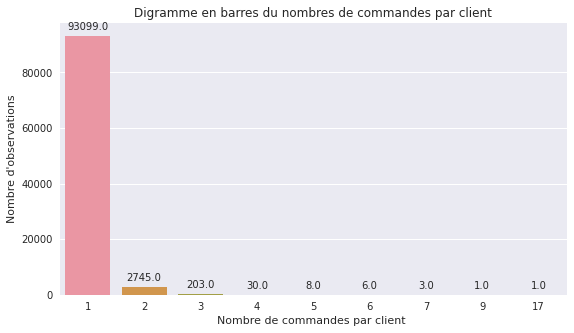

In [64]:
nb = number_of_orders['number_of_orders'].value_counts().index
count = number_of_orders['number_of_orders'].value_counts().values

fig = plt.figure(figsize=(20,5))


ax = fig.add_subplot(121)
bplot = sns.barplot(data=number_of_orders, x=nb, y=count)

for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Nombre de commandes par client ")
plt.ylabel("Nombre d'observations")
plt.title("Digramme en barres du nombres de commandes par client")
plt.show()

Nous constatons qu'une grande majorité des clients n'a réalisé qu'une commande sur la période. Nous vérifions les données relative du client qui a réalisé 17 commandes.

In [61]:
max_orders_id = number_of_orders[number_of_orders['number_of_orders']==17].values[0][0]
print("Les 17 commdes du client qui a réalisé la valeur maximale du nombre de commandes")
display(data[data['customer_unique_id']== max_orders_id])

Les 17 commdes du client qui a réalisé la valeur maximale du nombre de commandes


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
17018,1bd3585471932167ab72a84955ebefea,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,b850a16d8faf65a74c51287ef34379ce,delivered,2017-11-22 20:01:53,2017-11-22 20:12:32,2017-11-24 16:07:56,2017-11-27 18:49:13,2017-12-04 00:00:00,1.0,5bccc8fe44471df6c7b7e08176837d2f,1da3aeb70d7989d1e6d9b0e887f97c23,2017-11-28 20:12:32,13.99,7.78,sports_leisure,44.0,87.0,3.0,150.0,20.0,20.0,20.0,4265.0,sao paulo,SP,1.0,credit_card,1.0,21.77,68faf98deb4bc8c25eb42f07a1216f46,5,NaN,NaN,2017-11-28 00:00:00,2017-11-28 21:59:16
18371,a8fabc805e9a10a3c93ae5bff642b86b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,23427a6bd9f8fd1b51f1b1e5cc186ab8,delivered,2018-05-21 22:44:31,2018-05-22 01:53:35,2018-05-22 14:18:00,2018-05-23 15:33:09,2018-05-29 00:00:00,1.0,5cb96c51c55f57503465e4d2558dc053,db4350fd57ae30082dec7acbaacc17f9,2018-05-24 01:53:35,45.99,7.39,sports_leisure,53.0,282.0,1.0,300.0,35.0,6.0,11.0,3126.0,sao paulo,SP,1.0,credit_card,1.0,53.38,cb1172e327bba1a8784de2ecc9107c2e,5,NaN,NaN,2018-05-24 00:00:00,2018-05-24 18:57:51
19961,897b7f72042714efaa64ac306ba0cafc,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,c2213109a2cc0e75d55585b7aaac6d97,delivered,2018-08-07 23:32:14,2018-08-07 23:45:21,2018-08-09 13:35:00,2018-08-10 20:26:44,2018-08-13 00:00:00,1.0,de7df82eb1e48c456b020c2cfb03aeed,1da3aeb70d7989d1e6d9b0e887f97c23,2018-08-12 23:45:21,26.99,7.45,sports_leisure,60.0,333.0,2.0,200.0,30.0,20.0,20.0,4265.0,sao paulo,SP,1.0,credit_card,1.0,34.44,ae4bcc3a247dd80b95ec803024afc142,5,NaN,NaN,2018-08-11 00:00:00,2018-08-12 22:47:47
43393,b2b13de0770e06de50080fea77c459e6,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,369634708db140c5d2c4e365882c443a,delivered,2017-06-18 22:56:48,2017-06-18 23:10:19,2017-06-19 20:12:26,2017-06-23 12:55:50,2017-07-07 00:00:00,1.0,d83509907a19c72e1e4cdde78b8177ec,94e93ce877be27a515118dbfd2c2be41,2017-06-22 23:10:19,39.90,11.85,sports_leisure,25.0,303.0,2.0,200.0,25.0,5.0,12.0,15502.0,votuporanga,SP,1.0,credit_card,2.0,51.75,7ecc7adba17766dab9097a0116a75a66,5,NaN,NaN,2017-06-25 00:00:00,2017-06-26 20:53:55
45723,42dbc1ad9d560637c9c4c1533746f86d,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,bf92c69b7cc70f7fc2c37de43e366173,delivered,2017-07-24 22:11:50,2017-07-24 22:25:14,2017-07-26 01:42:03,2017-07-31 16:59:58,2017-08-15 00:00:00,1.0,e01bc2ad5c6f46c0f53f73379fcd602e,a3a38f4affed601eb87a97788c949667,2017-07-30 22:25:14,149.90,16.81,sports_leisure,28.0,1182.0,4.0,900.0,50.0,6.0,20.0,89204.0,joinville,SC,1.0,credit_card,3.0,166.71,8858e37108a15029eef04f510161fb8a,5,NaN,NaN,2017-08-01 00:00:00,2017-08-02 01:22:24
48129,dfb941d6f7b02f57a44c3b7c3fefb44b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,4f62d593acae92cea3c5662c76122478,delivered,2017-07-18 23:10:58,2017-07-18 23:23:26,2017-07-20 19:00:02,2017-07-21 16:19:40,2017-07-31 00:00:00,1.0,94cc774056d3f2b0dc693486a589025e,1da3aeb70d7989d1e6d9b0e887f97c23,2017-07-24 23:23:26,13.99,7.78,fashion_bags_accessories,29.0,99.0,3.0,150.0,20.0,20.0,20.0,4265.0,sao paulo,SP,1.0,credit_card,1.0,21.77,cb44e7ba6bacbf6f348aec2b9ab56790,5,NaN,NaN,2017-07-22 00:00:00,2017-07-24 12:52:56
58226,65f9db9dd07a4e79b625effa4c868fcb,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP,112eb6f37f1b9dabbced368fbbc6c9ef,delivered,2018-07-23 21:53:02,2018-07-24 10:31:34,2018-07-25 10:25:00,2018-07-2

### Nombre moyen et total de produits par commande pour chaque client

#### Nombre de produit pour chaque commande par client

In [62]:
avg_products_by_order = data.groupby(['customer_unique_id', 'order_id'], as_index=False).agg(avg_products_by_orders=pd.NamedAgg(column='order_item_id', aggfunc='count'))
avg_products_by_order

,customer_unique_id,order_id,avg_products_by_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,1
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,1
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,1
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,1
...,...,...,...
99436,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,2
99437,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,1
99438,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,1
99439,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,1


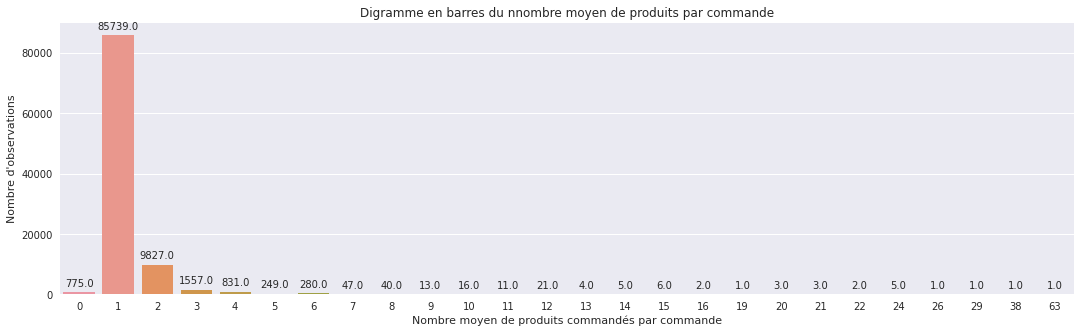

In [67]:
avg_products = avg_products_by_order['avg_products_by_orders'].value_counts().index
count = avg_products_by_order['avg_products_by_orders'].value_counts().values

fig = plt.figure(figsize=(40,5))


ax = fig.add_subplot(121)
bplot = sns.barplot(data=avg_products_by_order, x=avg_products, y=count)

for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Nombre moyen de produits commandés par commande")
plt.ylabel("Nombre d'observations")
plt.title("Digramme en barres du nnombre moyen de produits par commande")
plt.show()

In [68]:
avg_products_by_order[avg_products_by_order['avg_products_by_orders']==0]['oder']

,customer_unique_id,order_id,avg_products_by_orders
34,00172711b30d52eea8b313a7f2cced02,c306eca42d32507b970739b5b6a5a33a,0
125,004ad212c650c96c8a48f30855a7bcb8,2c9c2c96702997c879d75f927b76165e,0
181,0071f46a072a9ae25bbe4438b15efe9c,df8c077268f7f3baaac0892eb3143642,0
242,009b0127b727ab0ba422f6d9604487c7,809a282bbd5dbcabb6f2f724fca862ec,0
378,00f0b70fdcb8a6e1671b52a2472bd41f,ddaec6fff982b13e7e048b627a11d6da,0
...,...,...,...
99091,ff222edf83338ca6b35f8e29871fa07a,259fe605870f08ddf83ebb61f204b9e1,0
99103,ff28720521c749234b1ba19c9c986f4c,c60a44d6c46309c86882ffce00a0b412,0
99122,ff36be26206fffe1eb37afd54c70e18b,47282cfe5747c1c19920f090e491d285,0
99123,ff36be26206fffe1eb37afd54c70e18b,81b7c7bbc8ec003eeb67d87441a6a148,0


#### Calcul de la moyenne sur l'ensemble des commandes pour chaque client

In [70]:
number_products_by_customers=avg_products_by_order.groupby('customer_unique_id', as_index=False).agg(total_bought_products=pd.NamedAgg(column='avg_products_by_orders', aggfunc='sum'),
                                                                                                   avg_products_by_orders = pd.NamedAgg(column='avg_products_by_orders', aggfunc='mean'))
number_products_by_customers

,customer_unique_id,total_bought_products,avg_products_by_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0
2,0000f46a3911fa3c0805444483337064,1,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,1.0
4,0004aac84e0df4da2b147fca70cf8255,1,1.0
...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2,2.0
96092,fffea47cd6d3cc0a88bd621562a9d061,1,1.0
96093,ffff371b4d645b6ecea244b27531430a,1,1.0
96094,ffff5962728ec6157033ef9805bacc48,1,1.0


In [71]:
number_products_by_customers[number_products_by_customers['total_bought_products'] != number_products_by_customers['avg_products_by_orders']]

,customer_unique_id,total_bought_products,avg_products_by_orders
33,00172711b30d52eea8b313a7f2cced02,1,0.500000
106,004288347e5e88a27ded2bb23747066c,2,1.000000
124,004b45ec5c64187465168251cd1c9c2f,2,1.000000
144,0058f300f57d7b93c477a131a59b36c3,3,1.500000
249,00a39521eb40f7012db50455bf083460,2,1.000000
...,...,...,...
95784,ff36be26206fffe1eb37afd54c70e18b,1,0.333333
95810,ff44401d0d8f5b9c54a47374eb48c1b8,4,2.000000
95916,ff8892f7c26aa0446da53d01b18df463,3,1.500000
95934,ff922bdd6bafcdf99cb90d7f39cea5b3,3,1.000000


In [114]:
number_products_by_customers[number_products_by_customers['total_bought_products']>1]

,customer_unique_id,avg_products_by_order,total_bought_products
7,00053a61a98854899e70ed204dd4bafe,2.0,2
15,000bfa1d2f1a41876493be685390d6d3,2.0,2
18,000de6019bb59f34c099a907c151d855,2.0,2
19,000e309254ab1fc5ba99dd469d36bdb4,2.0,2
22,000fbf0473c10fc1ab6f8d2d286ce20c,4.0,4
...,...,...,...
96072,ffeddf8aa7cdecf403e77b2e9a99e2ea,2.0,2
96079,fff22793223fe80c97a8fd02ac5c6295,3.0,3
96083,fff5eb4918b2bf4b2da476788d42051c,6.0,6
96085,fff7219c86179ca6441b8f37823ba3d3,2.0,2


In [115]:
number_products_by_customers['total_bought_products'].max()

75

In [116]:
number_products_by_customers[number_products_by_customers['total_bought_products']==75]

,customer_unique_id,avg_products_by_order,total_bought_products
58030,9a736b248f67d166d2fbb006bcb877c3,37.5,75


In [117]:
data[data['customer_unique_id']=='9a736b248f67d166d2fbb006bcb877c3']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
22436,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,1.0,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,cama_mesa_banho,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ,17.0,voucher,1.0,16.70,eef5dbca8d37dfce6db7d7b16dd0525e,5,NaN,NaN,2017-08-15 00:00:00,2017-08-17 22:17:55
22437,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,1.0,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,cama_mesa_banho,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ,1.0,voucher,1.0,2.61,eef5dbca8d37dfce6db7d7b16dd0525e,5,NaN,NaN,2017-08-15 00:00:00,2017-08-17 22:17:55
22438,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,1.0,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,cama_mesa_banho,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ,13.0,voucher,1.0,16.70,eef5dbca8d37dfce6db7d7b16dd0525e,5,NaN,NaN,2017-08-15 00:00:00,2017-08-17 22:17:55
22439,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,1.0,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,cama_mesa_banho,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ,16.0,voucher,1.0,16.70,eef5dbca8d37dfce6db7d7b16dd0525e,5,NaN,NaN,2017-08-15 00:00:00,2017-08-17 22:17:55
22440,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,1.0,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,cama_mesa_banho,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ,19.0,voucher,1.0,0.24,eef5dbca8d37dfce6db7d7b16dd0525e,5,NaN,NaN,2017-08-15 00:00:00,2017-08-17 22:17:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93480,7cfe09e5bc5e9f1fab1a57d8ddd8eaee,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,67d83bd36ec2c7fb557742fb58837659,delivered,2017-07-27 12:50:46,2017-07-27 13:15:19,2017-07-31 20:29:16,2017-08-01 13:42:28,2017-08-16 00:00:00,1.0,4eb99b5f0d7e411f246a5c9c0ae27a5e,53e4c6e0f4312d4d2107a8c9cddf45cd,2017-08-02 13:15:19,45.20,26.97,moveis_decoracao,63.0,330.0,1.0,15100.0,50.0,40.0,40.0,13920.0,pedreira,SP,3.0,voucher,1.0,8.00,04a5bccd3da5cda99dbd34171e8f354a,5,NaN,NaN,2017-08-02 00:00:00,2017-08-02 20:26:23
93481,7cfe09e5bc5e9f1fab1a57d8ddd8eaee,9a736b248f67d166d2fbb006b

In [119]:
data[data['order_id']=='895ab968e7bb0d5659d16cd74cd1650c']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
22436,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,1.0,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,cama_mesa_banho,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ,17.0,voucher,1.0,16.70,eef5dbca8d37dfce6db7d7b16dd0525e,5,NaN,NaN,2017-08-15 00:00:00,2017-08-17 22:17:55
22437,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,1.0,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,cama_mesa_banho,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ,1.0,voucher,1.0,2.61,eef5dbca8d37dfce6db7d7b16dd0525e,5,NaN,NaN,2017-08-15 00:00:00,2017-08-17 22:17:55
22438,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,1.0,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,cama_mesa_banho,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ,13.0,voucher,1.0,16.70,eef5dbca8d37dfce6db7d7b16dd0525e,5,NaN,NaN,2017-08-15 00:00:00,2017-08-17 22:17:55
22439,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,1.0,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,cama_mesa_banho,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ,16.0,voucher,1.0,16.70,eef5dbca8d37dfce6db7d7b16dd0525e,5,NaN,NaN,2017-08-15 00:00:00,2017-08-17 22:17:55
22440,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,1.0,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,cama_mesa_banho,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,25803.0,tres rios,RJ,19.0,voucher,1.0,0.24,eef5dbca8d37dfce6db7d7b16dd0525e,5,NaN,NaN,2017-08-15 00:00:00,2017-08-17 22:17:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22494,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30 00:00:00,3.0,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,2017-08-14 20:43:31,83.80,5.12,utilidades_domesticas,56.0,548.0,8.0,450.0,30.0,20.0,11.0,89217.0,joinville,SC,15.0,voucher,1.0,16.70,eef5dbca8d37dfce6db7d7b16dd0525e,5,NaN,NaN,2017-08-15 00:00:00,2017-08-17 22:17:55
22495,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fb

### Première et dernière commande

In [97]:
first_last_orders = data.groupby(['customer_unique_id'], as_index=False).agg(first_order=pd.NamedAgg(column='order_purchase_timestamp', aggfunc='min'),
                                                                             last_order=pd.NamedAgg(column='order_purchase_timestamp', aggfunc='max'))
first_last_orders

,customer_unique_id,first_order,last_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42
...,...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2017-06-08 21:00:36
96092,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,2017-12-10 20:07:56
96093,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,2017-02-07 15:49:16
96094,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,2018-05-02 15:17:41


### Montant moyens des paniers

In [104]:
average_amount_by_order = data.groupby(['customer_unique_id', 'order_id'],as_index=False).agg(average_amount=pd.NamedAgg(column='price', aggfunc='mean'))
average_amount_by_order

,customer_unique_id,order_id,average_amount
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,18.90
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,25.99
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,180.00
...,...,...,...
99436,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,785.00
99437,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,64.89
99438,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,89.90
99439,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,115.00


In [107]:
average_amount_by_customer = average_amount_by_order.groupby(['customer_unique_id'], as_index=False)['average_amount'].mean()
average_amount_by_customer

,customer_unique_id,average_amount
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00
...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,785.00
96092,fffea47cd6d3cc0a88bd621562a9d061,64.89
96093,ffff371b4d645b6ecea244b27531430a,89.90
96094,ffff5962728ec6157033ef9805bacc48,115.00


### Nombre de commandes ayant fait l'objet d'une note

In [77]:
data[data['order_status']=='delivered'].shape[0] / data.shape[0] * 100

97.12969257496789

119151

In [88]:
data['order_status'].unique()

array(['delivered', 'canceled', 'invoiced', 'shipped', 'processing',
       'unavailable', 'approved', 'created'], dtype=object)

In [89]:
data['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [90]:
data[data['order_status']=='delivered'].shape[0] / data.shape[0] * 100

97.02034372140264